<a href="https://colab.research.google.com/github/vatsyashh/stroop-eye-tracking-exp/blob/main/Statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting relevant data from the csv(s)**

In [ ]:
import pandas as pd
import math
csv = pd.read_csv('/content/drive/MyDrive/Online data (EngageMe)/User-data/User00/User00.csv')


**Stroop Test**

In [ ]:
def compute_stroop(csv):
    stroop = csv[csv.type == "test trial"]
    total_trials_stroop = len(stroop)
    congruent = stroop[stroop.Congruency == "Con"]
    incongruent = stroop[stroop.Congruency == "Incon"]
    total_cong = len(congruent)
    total_incong = len(incongruent)
    total_correct = len(stroop[stroop.correct == True])
    correct_cong = len(congruent[congruent.correct == True])
    correct_incong = len(incongruent[incongruent.correct == True])

    accuracy = round(total_correct/total_trials_stroop * 100)
    median_rt = stroop[stroop.correct == True]['rt'].median()
    efficiency = accuracy/median_rt * 100

    median_rt_c = stroop[(stroop.correct == True) & (stroop.Congruency == "Con")]['rt'].median()
    median_rt_i = stroop[(stroop.correct == True) & (stroop.Congruency == "Incon")]['rt'].median()

    mean_rt_c = stroop[(stroop.correct == True) & (stroop.Congruency == "Con")]['rt'].mean()
    mean_rt_i = stroop[(stroop.correct == True) & (stroop.Congruency == "Incon")]['rt'].mean()

    accuracy_c = round(correct_cong/total_cong * 100)
    accuracy_i = round(correct_incong/ total_incong * 100)

    eff_c = accuracy_c/median_rt_c * 100
    eff_i = accuracy_i/median_rt_i * 100

    index = (eff_c - eff_i)/(eff_c + eff_i) * 100
    return (total_trials_stroop,total_correct, total_cong, correct_cong, total_incong, correct_incong, median_rt_c,median_rt_i, mean_rt_c, mean_rt_i, accuracy_c, accuracy_i, eff_c,eff_i, index)
#print(total_trials_stroop, total_cong, total_incong,total_correct, correct_cong, correct_incong, median_rt_c,median_rt_i, accuracy_c, accuracy_i, eff_c,eff_i)
print(compute_stroop(csv))

(90, 89, 30, 30, 60, 59, 647.75, 771.8999999910593, 714.0599999989073, 840.625423728662, 100, 98, 15.43805480509456, 12.695945070752055, 9.746604629427894)


**CPT**

In [ ]:
def compute_cpt(csv):   
    cpt = csv[csv.phase == 'test']
    total_cpt = len(cpt)

    match = cpt[cpt.match == True]
    nonmatch = cpt[cpt.match == False]

    correct_match = cpt[(cpt.match == True) & (cpt.correct == True)]
    correct_nonmatch = cpt[(cpt.match == False) & (cpt.correct == True)]

    n_match = len(match)
    n_nonmatch = len(nonmatch)
    n_correct_match = len(correct_match)
    n_correct_nonmatch = len(correct_nonmatch)
    median_rt_cpt = correct_match['rt'].median()
    mean_rt_cpt = correct_match['rt'].mean()

    falsealarm_rt = cpt[(cpt.match == False) & (cpt.correct == False)]['rt'].mean()

    miss_hits = n_match - n_correct_match
    false_alarms = n_nonmatch - n_correct_nonmatch

    acc_match = round(n_correct_match/n_match *100)
    acc_nonmatch = round(n_correct_nonmatch/n_nonmatch *100)
    eff_match = acc_match/median_rt_cpt * 100



    return total_cpt,n_match,n_correct_match, n_nonmatch, n_correct_nonmatch, median_rt_cpt, mean_rt_cpt,miss_hits, false_alarms, falsealarm_rt, acc_match, acc_nonmatch, eff_match
print(compute_cpt(csv))



(80, 37, 34, 43, 43, 664.4499999955297, 710.9470588240554, 3, 0, nan, 92, 100, 13.846038076697864)


**TMT**

In [ ]:
def compute_tmt(csv):
    tmt = csv[csv.trial_type == 'serial-reaction-time-mouse']
    mean_rt_tmt = tmt['rt'].mean()
    trial1 = tmt[tmt.phase=="Trial1"]
    trial2 = tmt[tmt.phase=="Trial2"]
    trial3 = tmt[tmt.phase=="Trial3"]

    trial1_rt = trial1['rt'].mean()
    trial2_rt = trial2['rt'].mean()
    trial3_rt = trial3['rt'].mean()
    return (mean_rt_tmt, trial1_rt, trial2_rt, trial3_rt)


def velocity(csv):
    tmt = csv[csv.trial_type == 'serial-reaction-time-mouse']
    mean_rt_tmt = tmt['rt'].mean()
    trial1 = tmt[tmt.phase=="Trial1"]
    trial2 = tmt[tmt.phase=="Trial2"]
    trial3 = tmt[tmt.phase=="Trial3"]
    # Finding dist/rt
    t1 = trial1[['response','rt']][:]
    v1 = [0]
    distances = [0]
    c = 0
    for i in t1.index:
        if(c==0):
            c+=1
            continue
        x1,y1 = t1['response'][i].split(',')
        x2,y2 = t1['response'][i-1].split(',')
        x1 = int(x1[1:len(x1)])
        x2 = int(x2[1:len(x2)])
        y1 = int(y1[:-1])
        y2 = int(y2[:-1])
        
        dist = math.sqrt((x1-x2)**2 + (y1-y2)**2)
        distances.append(dist)
        v1.append( dist / (t1['rt'][i]) )

    t1['Distance'] = distances
    t1['velocity'] = v1

    # print(v1)
    # print(t1)
    av_rt_first15 = t1.iloc[:15]['rt'].mean()
    av_rt_last9 = t1.iloc[15:]['rt'].mean()

    av_vel_first15 = t1.iloc[:15]['velocity'].mean()
    av_vel_last9 = t1.iloc[15:]['velocity'].mean()
    # print("Average RT of first 60% responses ---> ",av_rt_first15)
    # print("Average RT of last 40% responses ---> ",av_rt_last9)
    # print("Average velocity of first 60% responses ---> ",av_vel_first15)
    # print("Average velocity of last 40% responses ---> ",av_vel_last9)
    # display(t1)
    return (list(t1['rt'])+v1)
    
print(compute_tmt(csv))
print(velocity(csv))
    

(2405.139506171331, 3260.5916666630656, 2127.4777777774466, 1970.6733333324394)
[5592.899999991059, 1075.5, 2453.199999988079, 2507.2000000029802, 922.0, 986.2999999970198, 5753.899999991059, 1177.3999999910593, 2254.5, 5797.59999999404, 1686.0999999940395, 3004.79999999702, 6753.59999999404, 6672.799999997021, 9049.5, 4655.399999991059, 1781.0, 3329.600000008941, 868.5999999940394, 2777.8999999910598, 1624.4000000059605, 1489.6999999880788, 5482.200000002979, 558.0999999940395, 0, 0.007496288003996791, 0.008008675486908515, 0.0036117522088890608, 0.005422993492407809, 0.010189471379044163, 0.0013573836312620639, 0.003062299367667206, 0.005680305378073053, 0.00256417633974986, 0.007117015598151011, 0.001052408699471351, 0.001930585881665601, 0.0016140645027984978, 0.0016427502897749607, 0.002372591188127438, 0.004630101769362898, 0.003003363767411445, 0.0016281528463997236, 0.0032197962165765306, 0.0012312238364889567, 0.005412000905123895, 0.0015584990962228462, 0.0073877542119005464]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dict = {'total_trials_stroop':[],'total_correct':[],'total_cong':[],'correct_cong':[],'total_incong':[],'correct_incong':[],'median_rt_c':[],'median_rt_i':[], 'mean_rt_c':[],'mean_rt_i':[],'accuracy_c':[],'accuracy_i':[],'eff_c':[],'eff_i':[],'index':[],'total_cpt':[],'n_match':[],'n_correct_match':[],'n_nonmatch':[],'n_correct_nonmatch':[],'median_rt_cpt':[],'mean_rt_cpt':[],'miss_hits':[], 'false_alarms':[],'false_alarm_rt':[],'accuracy_match':[],'accuracy_nonmatch':[],'eff_match':[],'mean_rt_tmt':[],'trial1_rt':[],'trial2_rt':[],'trial3_rt':[]}
Final = pd.DataFrame(dict)

tmt_elaborated = {}
for i in range(1,25):
    tmt_elaborated['rt_'+ str(i)] = []
for i in range(1,25):   
    tmt_elaborated['vel_'+ str(i)] = []

tmt_df = pd.DataFrame(tmt_elaborated)



for i in range(0,55):
    try:
        csv = pd.read_csv('/content/drive/MyDrive/Online data (EngageMe)/User-data/User0'+str(i)+'/User0'+str(i)+'.csv')
        # csv = pd.read_csv('/content/drive/MyDrive/Engageme/DATA_engageMe/Data_'+str(i)+'.csv')
        Final.loc[len(Final.index)] = list(compute_stroop(csv) + compute_cpt(csv) + compute_tmt(csv))
        tmt_df.loc[len(tmt_df.index)] = velocity(csv)
    except:
        continue

Final.to_csv("EngagaeMe_data.csv")
tmt_df.to_csv("TMT_data.csv")

Final


,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match,mean_rt_tmt,trial1_rt,trial2_rt,trial3_rt
0,90.0,89.0,30.0,30.0,60.0,59.0,734.75,854.00,845.083333,969.888136,100.0,98.0,13.610071,11.475410,8.509550,80.0,21.0,21.0,59.0,59.0,675.70,733.652381,0.0,0.0,NaN,100.0,100.0,14.799467,1794.513580,1860.441667,1683.981481,1841.250000
1,90.0,48.0,30.0,18.0,60.0,30.0,987.40,983.60,1077.838889,1107.826667,60.0,50.0,6.076565,5.083367,8.899673,80.0,29.0,18.0,51.0,51.0,934.70,961.716667,11.0,0.0,NaN,62.0,100.0,6.633144,2490.243210,2150.912500,2585.740741,2675.760000
2,90.0,88.0,30.0,28.0,60.0,60.0,801.75,884.40,839.321429,975.423333,93.0,100.0,11.599626,11.307101,1.277026,80.0,28.0,20.0,52.0,50.0,1101.70,1179.310000,8.0,2.0,571.350000,71.0,96.0,6.444586,2895.492593,3444.045833,2133.585185,3142.366667
3,90.0,89.0,30.0,30.0,60.0,59.0,788.80,798.20,845.253333,888.462712,100.0,98.0,12.677485,12.277625,1.602318,80.0,30.0,30.0,50.0,6.0,828.25,885.490000,0.0,44.0,879.225000,100.0,12.0,12.073649,2073.096296,2569.033333,1915.725926,1817.980000
4,90.0,83.0,30.0,30.0,60.0,53.0,825.30,849.10,933.140000,979.047170,100.0,88.0,12.116806,10.363915,7.797309,80.0,37.0,22.0,43.0,41.0,824.20,966.309091,15.0,2.0,1382.750000,59.0,95.0,7.158457,3108.500000,2833.991667,3787.448148,2717.053333
5,90.0,90.0,30.0,30.0,60.0,60.0,644.20,707.35,726.260000,785.513333,100.0,100.0,15.523129,14.137273,4.672413,80.0,25.0,25.0,55.0,55.0,926.00,976.516000,0.0,0.0,NaN,100.0,100.0,10.799136,1772.772840,1950.000000,1619.729630,1768.730000
6,90.0,83.0,30.0,29.0,60.0,54.0,788.00,776.30,799.027586,804.679630,97.0,90.0,12.309645,11.593456,2.996216,80.0,18.0,14.0,62.0,62.0,915.90,1062.985714,4.0,0.0,NaN,78.0,100.0,8.516214,2559.708642,3257.816667,2016.174074,2490.403333
7,90.0,85.0,30.0,26.0,60.0,59.0,819.55,835.10,948.592308,921.440678,87.0,98.0,10.615582,11.735122,-5.008969,80.0,23.0,20.0,57.0,55.0,1197.65,1201.235000,3.0,2.0,1545.750000,87.0,96.0,7.264226,3551.354321,3972.404167,3097.240741,3623.216667
8,90.0,87.0,30.0,30.0,60.0,57.0,923.75,1066.70,1057.066667,1252.207018,100.0,95.0,10.825440,8.905972,9.727982,80.0,23.0,1.0,57.0,48.0,1363.30,1363.300000,22.0,9.0,1090.555556,4.0,84.0,0.293406,2428.955556,2552.400000,2039.088889,2681.080000
9,90.0,82.0,30.0,26.0,60.0,56.0,670.30,765.05,675.623077,828.194643,87.0,93.0,12.979263,12.156068,3.275050,80.0,34.0,27.0,46.0,13.0,722.90,764.751852,7.0,33.0,599.869697,79.0,28.0,10.928206,2940.170370,3125.287500,2256.611111,3407.280000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#engageme = pd.read_csv('/content/drive/MyDrive/Engageme/EngagaeMe_data.csv', index_col=0)
engageme = pd.read_csv('/content/EngagaeMe_data.csv', index_col=0)

In [ ]:
engageme.head()

,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match,mean_rt_tmt,trial1_rt,trial2_rt,trial3_rt
0,90.0,89.0,30.0,30.0,60.0,59.0,734.75,854.0,845.083333,969.888136,100.0,98.0,13.610071,11.475410,8.509550,80.0,21.0,21.0,59.0,59.0,675.70,733.652381,0.0,0.0,NaN,100.0,100.0,14.799467,1794.513580,1860.441667,1683.981481,1841.250000
1,90.0,48.0,30.0,18.0,60.0,30.0,987.40,983.6,1077.838889,1107.826667,60.0,50.0,6.076565,5.083367,8.899673,80.0,29.0,18.0,51.0,51.0,934.70,961.716667,11.0,0.0,NaN,62.0,100.0,6.633144,2490.243210,2150.912500,2585.740741,2675.760000
2,90.0,88.0,30.0,28.0,60.0,60.0,801.75,884.4,839.321429,975.423333,93.0,100.0,11.599626,11.307101,1.277026,80.0,28.0,20.0,52.0,50.0,1101.70,1179.310000,8.0,2.0,571.350,71.0,96.0,6.444586,2895.492593,3444.045833,2133.585185,3142.366667
3,90.0,89.0,30.0,30.0,60.0,59.0,788.80,798.2,845.253333,888.462712,100.0,98.0,12.677485,12.277625,1.602318,80.0,30.0,30.0,50.0,6.0,828.25,885.490000,0.0,44.0,879.225,100.0,12.0,12.073649,2073.096296,2569.033333,1915.725926,1817.980000
4,90.0,83.0,30.0,30.0,60.0,53.0,825.30,849.1,933.140000,979.047170,100.0,88.0,12.116806,10.363915,7.797309,80.0,37.0,22.0,43.0,41.0,824.20,966.309091,15.0,2.0,1382.750,59.0,95.0,7.158457,3108.500000,2833.991667,3787.448148,2717.053333


In [ ]:
# Stroop Test
stroop_test = engageme.loc[:, ['total_trials_stroop', 'total_correct', 'total_cong', 'correct_cong', 'total_incong', 'correct_incong', 
                           'median_rt_c', 'median_rt_i', 'mean_rt_c', 'mean_rt_i','accuracy_c',	'accuracy_i',	'eff_c', 'eff_i','index']]

# stroop_test.info()

stroop_test.head()

,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index
0,90.0,89.0,30.0,30.0,60.0,59.0,734.75,854.0,845.083333,969.888136,100.0,98.0,13.610071,11.475410,8.509550
1,90.0,48.0,30.0,18.0,60.0,30.0,987.40,983.6,1077.838889,1107.826667,60.0,50.0,6.076565,5.083367,8.899673
2,90.0,88.0,30.0,28.0,60.0,60.0,801.75,884.4,839.321429,975.423333,93.0,100.0,11.599626,11.307101,1.277026
3,90.0,89.0,30.0,30.0,60.0,59.0,788.80,798.2,845.253333,888.462712,100.0,98.0,12.677485,12.277625,1.602318
4,90.0,83.0,30.0,30.0,60.0,53.0,825.30,849.1,933.140000,979.047170,100.0,88.0,12.116806,10.363915,7.797309


In [ ]:
stroop_test.describe()

,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index
count,54.0,54.000000,54.0,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000
mean,90.0,83.222222,30.0,28.055556,60.0,55.166667,831.611111,895.231481,922.318861,985.501479,93.62963,91.925926,11.733623,10.710733,4.671859
std,0.0,10.451445,0.0,3.383738,0.0,7.378577,178.266544,192.241050,215.106704,214.768171,11.28916,12.237973,2.691509,2.558850,6.110820
min,90.0,28.000000,30.0,9.000000,60.0,19.000000,565.700000,624.300000,600.289655,696.973684,30.00000,32.000000,3.318217,3.284072,-11.819821
25%,90.0,83.000000,30.0,28.000000,60.0,55.000000,713.525000,765.312500,741.399286,811.910605,93.00000,92.000000,10.247319,9.304455,1.358349
50%,90.0,86.000000,30.0,29.000000,60.0,57.000000,790.100000,840.500000,894.973333,942.377382,97.00000,95.000000,11.979042,11.401852,4.081065
75%,90.0,88.000000,30.0,30.000000,60.0,59.000000,912.500000,981.300000,1060.396839,1107.691875,100.00000,98.000000,13.343409,12.404460,8.361252
max,90.0,90.000000,30.0,30.000000,60.0,60.000000,1470.450000,1573.800000,1440.834483,1608.942373,100.00000,100.000000,17.146898,14.896684,19.434959


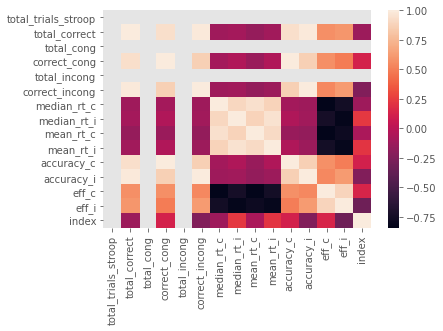

In [ ]:
import seaborn as sns

stroop_cor = stroop_test.corr()

sns.heatmap(stroop_cor)

plt.show()

In [ ]:
area = (20 * np.random.rand(stroop_test.shape[0]))**2

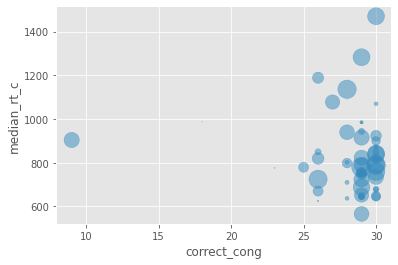

In [ ]:
stroop_test.plot.scatter(x='correct_cong',y='median_rt_c', colormap='viridis', grid=True, s=area, alpha=0.5)

Text(0, 0.5, 'Response Time (in ms)')

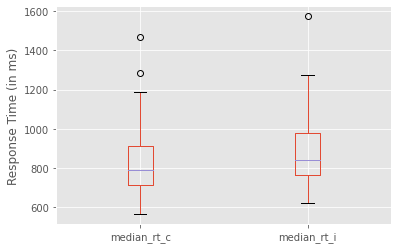

In [ ]:
stroop_test.boxplot(column=['median_rt_c', 'median_rt_i'])
plt.ylabel('Response Time (in ms)')

Observation: Response time of Incongruent response > Response time of congruent response

More outliers in incongurent responses.

Outlier's rt > 1400 ms

Text(0, 0.5, 'Accuracy')

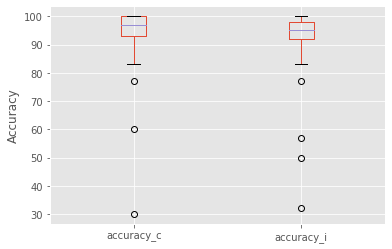

In [ ]:
stroop_test.boxplot(column=['accuracy_c', 'accuracy_i'])
plt.ylabel('Accuracy')

Congruent accuracy > Incongruent accuracy

Text(0, 0.5, 'Efficiency ( accuracy/ response time ) ')

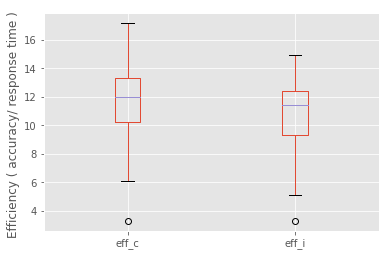

In [ ]:
stroop_test.boxplot(column=['eff_c', 'eff_i'])
plt.ylabel('Efficiency ( accuracy/ response time ) ')

Observation: Performance Efficiency in congruent response > Performance Efficiency in incongruent response

Outliers efficiency < 4

**CPT EDA**

In [ ]:
# CPT
CPT = engageme.loc[:, ['total_cpt', 'n_match', 'n_correct_match',	'n_nonmatch', 'n_correct_nonmatch', 'median_rt_cpt', 'mean_rt_cpt',
                                 'miss_hits', 'false_alarms','false_alarm_rt', 'accuracy_match', 'accuracy_nonmatch', 'eff_match']]

CPT.describe()

,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match
count,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,46.000000,54.000000,54.000000,54.000000
mean,80.0,27.129630,21.907407,52.870370,43.888889,873.375000,925.239486,5.222222,8.981481,991.889847,80.648148,82.240741,9.722932
std,0.0,4.633945,5.985103,4.633945,14.540336,194.650878,191.251393,4.660823,12.749385,333.414171,17.460638,25.702166,2.796351
min,80.0,18.000000,1.000000,43.000000,6.000000,337.000000,315.478571,0.000000,0.000000,168.100000,4.000000,12.000000,0.293406
25%,80.0,24.250000,18.250000,50.250000,42.250000,759.900000,809.878373,2.000000,2.000000,798.747500,74.000000,83.250000,8.031789
50%,80.0,27.500000,21.500000,52.500000,49.000000,848.700000,898.042963,4.000000,4.000000,980.926667,87.000000,93.000000,9.700653
75%,80.0,29.750000,26.000000,55.750000,52.750000,981.112500,1008.254167,8.000000,9.750000,1169.081250,93.000000,96.000000,11.372356
max,80.0,37.000000,35.000000,62.000000,62.000000,1363.300000,1371.580000,22.000000,45.000000,1839.300000,100.000000,100.000000,15.268730


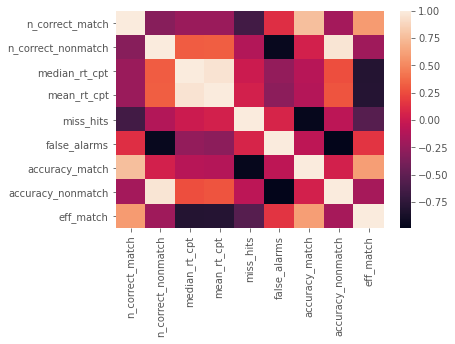

In [ ]:
import seaborn as sns

CPT_heatmap = CPT.loc[:, [ 'n_correct_match', 'n_correct_nonmatch', 'median_rt_cpt', 'mean_rt_cpt',
                                 'miss_hits', 'false_alarms', 'accuracy_match', 'accuracy_nonmatch', 'eff_match']]
CPT_cor = CPT_heatmap.corr()

sns.heatmap(CPT_cor)

plt.show()

Observations:
Negative correlation of false alarms and Response time. ( Impulsivity; suggesting to review the RT of false alarms explicitly)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Response times ')

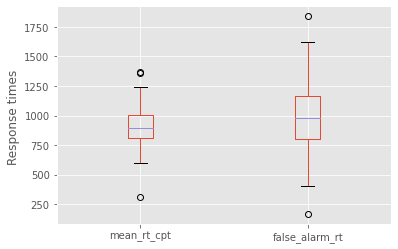

In [ ]:
CPT.boxplot(column=['mean_rt_cpt', 'false_alarm_rt'])
plt.ylabel('Response times ')

Inference: The bell curve is more spread in case of the response time for incorrect responses. 

More outliers with very less rt in false alarm cases ( Impulsivity)

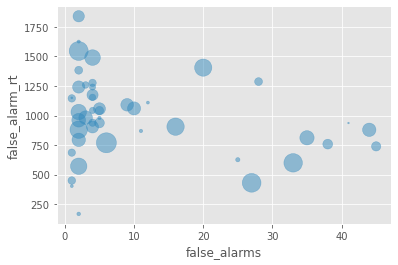

In [ ]:
CPT.plot.scatter(x='false_alarms',y='false_alarm_rt', colormap='viridis', grid=True, s=area, alpha=0.5)

Text(0, 0.5, 'Efficiency')

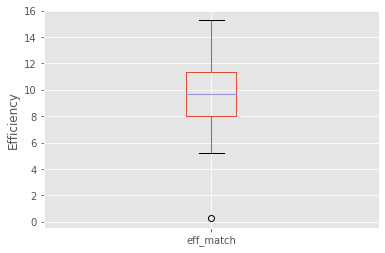

In [ ]:
CPT.boxplot(column=['eff_match'])
plt.ylabel('Efficiency')

Text(0, 0.5, 'Accuracy')

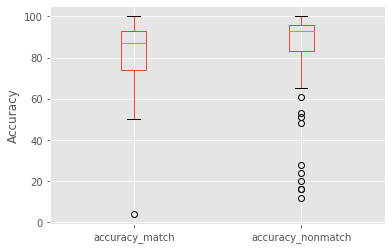

In [ ]:
CPT.boxplot(column=['accuracy_match','accuracy_nonmatch'])
plt.ylabel('Accuracy')

Non matching accuracy < 40 ----> random key presses. Can be removed.

**TMT EDA**

In [ ]:
TMT = engageme.loc[:, ['mean_rt_tmt','trial1_rt','trial2_rt','trial3_rt']]

Text(0, 0.5, 'Response times')

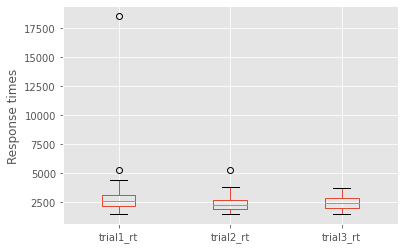

In [ ]:
TMT.boxplot(column=['trial1_rt','trial2_rt','trial3_rt'])
plt.ylabel('Response times')

In [ ]:
TMT_data = pd.read_csv('/content/drive/MyDrive/Engageme/TMT_data.csv', index_col=0)

In [ ]:
TMT_data.describe()

,rt_1,rt_2,rt_3,rt_4,rt_5,rt_6,rt_7,rt_8,rt_9,rt_10,rt_11,rt_12,rt_13,rt_14,rt_15,rt_16,rt_17,rt_18,rt_19,rt_20,rt_21,rt_22,rt_23,rt_24,vel_1,vel_2,vel_3,vel_4,vel_5,vel_6,vel_7,vel_8,vel_9,vel_10,vel_11,vel_12,vel_13,vel_14,vel_15,vel_16,vel_17,vel_18,vel_19,vel_20,vel_21,vel_22,vel_23,vel_24
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,9926.894286,2500.462857,3190.974286,2368.874286,4029.564286,2024.531429,2517.664286,3260.530000,2851.091429,3610.262857,3023.954286,3368.584286,3053.058571,2774.552857,2784.074286,2304.145714,3157.354286,2190.458571,2647.725714,1599.607143,2142.931429,1495.000000,1779.071429,1058.478571,0.0,0.005095,0.003869,0.004180,0.003603,0.005516,0.004784,0.004824,0.004488,0.005064,0.003841,0.004274,0.003908,0.004964,0.003812,0.004972,0.003771,0.005027,0.005123,0.007376,0.005091,0.007172,0.006803,0.008956
std,42062.490335,2697.720501,2202.061622,1725.384434,4237.815930,1506.134029,1953.717663,6868.621322,2222.279630,5967.585889,1780.006664,7265.355439,1698.090715,2616.161317,1833.767154,1707.786092,2509.441117,1768.995169,2875.124033,1003.192578,1658.682802,776.318464,2343.020800,348.111257,0.0,0.003373,0.003039,0.002752,0.002910,0.003707,0.003074,0.003033,0.003085,0.003904,0.002446,0.003666,0.002698,0.003310,0.002794,0.003300,0.002890,0.002631,0.003511,0.004838,0.002949,0.004519,0.004253,0.004623
min,1341.000000,697.300000,727.100000,512.500000,745.900000,527.700000,451.100000,727.400000,517.700000,424.900000,753.500000,844.200000,662.500000,685.600000,890.300000,641.300000,770.100000,394.300000,563.600000,646.000000,642.700000,432.200000,627.900000,550.800000,0.0,0.000423,0.000325,0.000674,0.000384,0.000465,0.000423,0.000122,0.000158,0.000113,0.000431,0.000099,0.000175,0.000170,0.000253,0.000145,0.000266,0.000413,0.000173,0.001039,0.001045,0.000679,0.000113,0.002838
25%,2535.825000,1122.750000,1768.675000,1160.100000,1566.075000,1070.775000,1304.775000,1195.725000,1464.975000,1326.475000,1768.800000,1239.025000,2022.100000,1319.150000,1521.175000,1312.450000,1657.450000,1210.175000,1336.375000,955.000000,1172.075000,1049.950000,1008.900000,769.350000,0.0,0.002739,0.001873,0.001975,0.001327,0.002839,0.002542,0.002571,0.002206,0.002067,0.002236,0.001802,0.002107,0.002425,0.001791,0.002691,0.001685,0.002977,0.002513,0.003847,0.002926,0.004052,0.003906,0.005885
50%,3858.900000,1635.800000,2555.450000,1931.400000,2328.400000,1367.350000,1808.600000,1617.450000,2302.200000,1931.200000,2566.800000,2079.100000,2770.200000,2084.650000,2280.550000,1788.250000,2410.450000,1721.950000,2164.400000,1356.650000,1586.850000,1347.800000,1246.350000,1029.400000,0.0,0.004293,0.003381,0.003664,0.002620,0.004479,0.004141,0.004253,0.003405,0.004099,0.003404,0.003396,0.002753,0.004159,0.003058,0.004353,0.002721,0.004892,0.004718,0.006596,0.004514,0.006151,0.005956,0.007766
75%,5682.825000,2906.125000,3884.750000,2706.225000,4820.250000,2661.400000,3186.175000,3393.250000,3307.525000,3468.625000,3678.925000,3061.200000,3919.050000,2835.525000,3601.525000,2694.425000,3978.700000,2459.950000,2873.200000,1956.250000,2540.250000,1717.050000,1710.600000,1293.900000,0.0,0.006953,0.005226,0.006029,0.004912,0.007067,0.006574,0.005973,0.006306,0.007701,0.004857,0.005527,0.005349,0.007129,0.004909,0.007014,0.005641,0.006845,0.006856,0.009162,0.007155,0.009701,0.008711,0.011183
max,354797.700000,19231.000000,11473.200000,8120.700000,21016.400000,9047.700000,9748.600000,57785.900000,14187.900000,35175.700000,10357.900000,61739.100000,10914.300000,18642.100000,10624.200000,10484.200000,18065.800000,10826.50

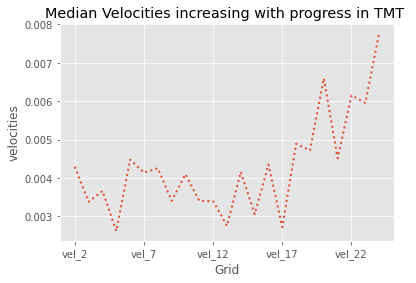

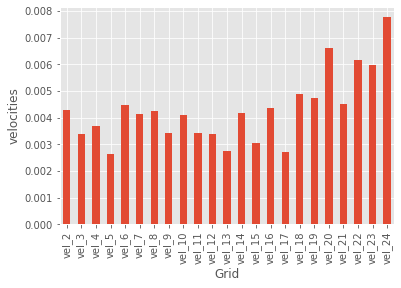

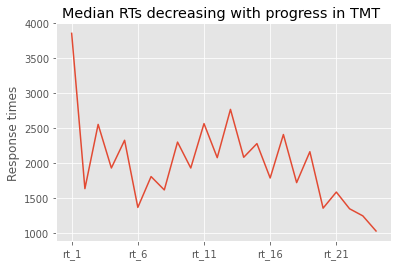

In [ ]:
plt.style.use('ggplot')
velocities = TMT_data.iloc[: , 25:50]
velocities.median().plot(linestyle=":", linewidth=2)
plt.title("Median Velocities increasing with progress in TMT ")
plt.ylabel("velocities")
plt.xlabel("Grid")

plt.show()

velocities.median().plot.bar()
plt.ylabel("velocities")
plt.xlabel("Grid")

RTs = TMT_data.iloc[: , :24]
plt.show()
RTs.median().plot()
plt.title("Median RTs decreasing with progress in TMT ")
plt.ylabel("Response times")
plt.show()


**Z score analysis**

In [ ]:
from scipy.stats import zscore
import numpy as np

def remove_outliers(data,cutoff, columns):
    d = data.loc[:,columns]
    z_scores= zscore(d)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < cutoff).all(axis=1)                                                                                                       

    filtered = data[filtered_entries]


    removed = np.setdiff1d(data.index,filtered.index )
    print("removed entries----- ",np.setdiff1d(data.index,filtered.index ))

    return filtered, engageme.loc[removed]

# engage = engageme.loc[:,['total_correct', 'correct_cong','correct_incong','median_rt_c','median_rt_i','mean_rt_c','mean_rt_i','accuracy_c','accuracy_i','eff_c','eff_i','median_rt_cpt','mean_rt_cpt','accuracy_match','accuracy_nonmatch','eff_match','mean_rt_tmt','trial1_rt','trial2_rt','trial3_rt']]

# z_scores = zscore(engage)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)                                                                                                       

# filtered = engageme[filtered_entries]


# removed = np.setdiff1d(engageme.index,filtered.index )
# print(np.setdiff1d(engageme.index,filtered.index ))


filtered,removed = remove_outliers(engageme,3,['total_correct', 'correct_cong','correct_incong','median_rt_c','median_rt_i','mean_rt_c','mean_rt_i','accuracy_c','accuracy_i','eff_c','eff_i','median_rt_cpt','mean_rt_cpt','accuracy_match','accuracy_nonmatch','eff_match','mean_rt_tmt','trial1_rt','trial2_rt','trial3_rt'])


display(removed)
filtered.head()


removed entries-----  [ 1  8 21 44 49 52]


,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match,mean_rt_tmt,trial1_rt,trial2_rt,trial3_rt
1,90.0,48.0,30.0,18.0,60.0,30.0,987.40,983.6,1077.838889,1107.826667,60.0,50.0,6.076565,5.083367,8.899673,80.0,29.0,18.0,51.0,51.0,934.70,961.716667,11.0,0.0,NaN,62.0,100.0,6.633144,2490.243210,2150.912500,2585.740741,2675.76
8,90.0,87.0,30.0,30.0,60.0,57.0,923.75,1066.7,1057.066667,1252.207018,100.0,95.0,10.825440,8.905972,9.727982,80.0,23.0,1.0,57.0,48.0,1363.30,1363.300000,22.0,9.0,1090.555556,4.0,84.0,0.293406,2428.955556,2552.400000,2039.088889,2681.08
21,90.0,28.0,30.0,9.0,60.0,19.0,904.10,974.4,1108.033333,1094.757895,30.0,32.0,3.318217,3.284072,0.517165,80.0,20.0,12.0,60.0,32.0,988.15,1007.766667,8.0,28.0,1286.875000,60.0,53.0,6.071953,2341.776543,2054.595833,2696.588889,2252.19
44,90.0,81.0,30.0,28.0,60.0,53.0,798.40,929.7,952.167857,990.266038,93.0,88.0,11.648297,9.465419,10.338671,80.0,28.0,21.0,52.0,51.0,491.20,679.300000,7.0,1.0,450.300000,75.0,98.0,15.268730,8374.962963,18481.554167,5276.129630,3078.64
49,90.0,85.0,30.0,29.0,60.0,56.0,751.30,988.5,776.903448,1057.980357,97.0,93.0,12.910954,9.408194,15.693968,80.0,28.0,14.0,52.0,25.0,337.00,315.478571,14.0,27.0,430.825926,50.0,48.0,14.836795,2606.922222,3147.416667,2454.940741,2311.31
52,90.0,89.0,30.0,30.0,60.0,59.0,1470.45,1573.8,1438.660000,1608.942373,100.0,98.0,6.800639,6.226967,4.403516,80.0,35.0,35.0,45.0,7.0,755.70,777.760000,0.0,38.0,758.094737,100.0,16.0,13.232764,2655.091358,2908.408333,2540.577778,2555.50


,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match,mean_rt_tmt,trial1_rt,trial2_rt,trial3_rt
0,90.0,89.0,30.0,30.0,60.0,59.0,734.75,854.00,845.083333,969.888136,100.0,98.0,13.610071,11.475410,8.509550,80.0,21.0,21.0,59.0,59.0,675.70,733.652381,0.0,0.0,NaN,100.0,100.0,14.799467,1794.513580,1860.441667,1683.981481,1841.250000
2,90.0,88.0,30.0,28.0,60.0,60.0,801.75,884.40,839.321429,975.423333,93.0,100.0,11.599626,11.307101,1.277026,80.0,28.0,20.0,52.0,50.0,1101.70,1179.310000,8.0,2.0,571.350,71.0,96.0,6.444586,2895.492593,3444.045833,2133.585185,3142.366667
3,90.0,89.0,30.0,30.0,60.0,59.0,788.80,798.20,845.253333,888.462712,100.0,98.0,12.677485,12.277625,1.602318,80.0,30.0,30.0,50.0,6.0,828.25,885.490000,0.0,44.0,879.225,100.0,12.0,12.073649,2073.096296,2569.033333,1915.725926,1817.980000
4,90.0,83.0,30.0,30.0,60.0,53.0,825.30,849.10,933.140000,979.047170,100.0,88.0,12.116806,10.363915,7.797309,80.0,37.0,22.0,43.0,41.0,824.20,966.309091,15.0,2.0,1382.750,59.0,95.0,7.158457,3108.500000,2833.991667,3787.448148,2717.053333
5,90.0,90.0,30.0,30.0,60.0,60.0,644.20,707.35,726.260000,785.513333,100.0,100.0,15.523129,14.137273,4.672413,80.0,25.0,25.0,55.0,55.0,926.00,976.516000,0.0,0.0,NaN,100.0,100.0,10.799136,1772.772840,1950.000000,1619.729630,1768.730000


Text(0, 0.5, 'Response times')

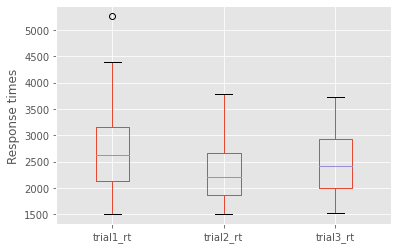

In [ ]:
TMT_2 = filtered.loc[:, ['mean_rt_tmt','trial1_rt','trial2_rt','trial3_rt']]
TMT_2.boxplot(column=['trial1_rt','trial2_rt','trial3_rt'])
plt.ylabel('Response times')

Text(0, 0.5, 'Accuracy')

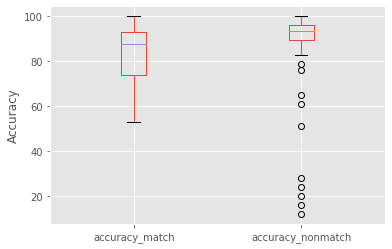

In [ ]:
filtered.boxplot(column=['accuracy_match','accuracy_nonmatch'])
plt.ylabel('Accuracy')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Response times ')

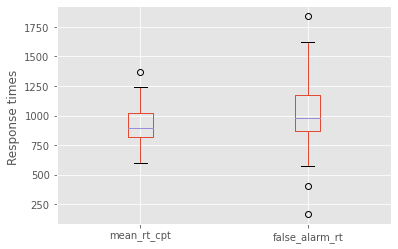

In [ ]:
filtered.boxplot(column=['mean_rt_cpt', 'false_alarm_rt'])
plt.ylabel('Response times ')

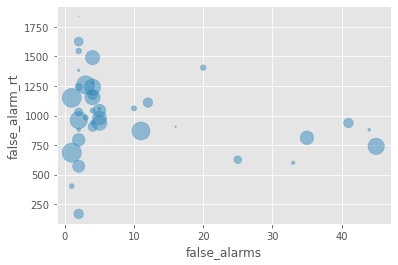

In [ ]:
filtered.plot.scatter(x='false_alarms',y='false_alarm_rt', colormap='viridis', grid=True, s=(20 * np.random.rand(filtered.shape[0]))**2, alpha=0.5)


Impulsive: left bottom

**Label Generation**

1. CPT

In [ ]:
CPT.describe()

,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match
count,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,46.000000,54.000000,54.000000,54.000000
mean,80.0,27.129630,21.907407,52.870370,43.888889,873.375000,925.239486,5.222222,8.981481,991.889847,80.648148,82.240741,9.722932
std,0.0,4.633945,5.985103,4.633945,14.540336,194.650878,191.251393,4.660823,12.749385,333.414171,17.460638,25.702166,2.796351
min,80.0,18.000000,1.000000,43.000000,6.000000,337.000000,315.478571,0.000000,0.000000,168.100000,4.000000,12.000000,0.293406
25%,80.0,24.250000,18.250000,50.250000,42.250000,759.900000,809.878373,2.000000,2.000000,798.747500,74.000000,83.250000,8.031789
50%,80.0,27.500000,21.500000,52.500000,49.000000,848.700000,898.042963,4.000000,4.000000,980.926667,87.000000,93.000000,9.700653
75%,80.0,29.750000,26.000000,55.750000,52.750000,981.112500,1008.254167,8.000000,9.750000,1169.081250,93.000000,96.000000,11.372356
max,80.0,37.000000,35.000000,62.000000,62.000000,1363.300000,1371.580000,22.000000,45.000000,1839.300000,100.000000,100.000000,15.268730


Not classified category of attention

In [ ]:

CPT_clean, removed = remove_outliers(CPT,2.5,['eff_match','accuracy_nonmatch'])
display(removed)

removed entries-----  [ 3  8 45 52]


,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match,mean_rt_tmt,trial1_rt,trial2_rt,trial3_rt
3,90.0,89.0,30.0,30.0,60.0,59.0,788.80,798.2,845.253333,888.462712,100.0,98.0,12.677485,12.277625,1.602318,80.0,30.0,30.0,50.0,6.0,828.25,885.490000,0.0,44.0,879.225000,100.0,12.0,12.073649,2073.096296,2569.033333,1915.725926,1817.98
8,90.0,87.0,30.0,30.0,60.0,57.0,923.75,1066.7,1057.066667,1252.207018,100.0,95.0,10.825440,8.905972,9.727982,80.0,23.0,1.0,57.0,48.0,1363.30,1363.300000,22.0,9.0,1090.555556,4.0,84.0,0.293406,2428.955556,2552.400000,2039.088889,2681.08
45,90.0,85.0,30.0,28.0,60.0,57.0,710.10,834.5,736.485714,891.736842,93.0,95.0,13.096747,11.384062,6.996029,80.0,31.0,31.0,49.0,8.0,852.10,857.325806,0.0,41.0,936.565854,100.0,16.0,11.735712,2066.538272,2649.758333,1504.485185,2105.81
52,90.0,89.0,30.0,30.0,60.0,59.0,1470.45,1573.8,1438.660000,1608.942373,100.0,98.0,6.800639,6.226967,4.403516,80.0,35.0,35.0,45.0,7.0,755.70,777.760000,0.0,38.0,758.094737,100.0,16.0,13.232764,2655.091358,2908.408333,2540.577778,2555.50


In [ ]:
CPT_clean.describe()

,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,42.000000,50.000000,50.000000,50.000000
mean,80.0,26.920000,21.720000,53.080000,46.020000,867.258000,921.581129,5.200000,7.06000,999.106948,81.020000,86.260000,9.754056
std,0.0,4.592985,4.823582,4.592985,11.846794,188.975834,187.250644,4.010191,10.43622,346.413280,13.667315,20.449849,2.489067
min,80.0,18.000000,12.000000,43.000000,9.000000,337.000000,315.478571,0.000000,0.00000,168.100000,50.000000,20.000000,5.250965
25%,80.0,24.250000,18.250000,51.000000,43.250000,759.337500,809.878373,2.000000,1.25000,798.747500,74.000000,90.250000,8.031789
50%,80.0,27.000000,21.000000,53.000000,50.000000,850.800000,908.270296,4.000000,3.00000,1005.966667,86.500000,94.500000,9.592381
75%,80.0,29.000000,25.750000,55.750000,53.000000,981.112500,1008.254167,8.000000,5.00000,1224.043750,92.000000,97.500000,11.150762
max,80.0,37.000000,34.000000,62.000000,62.000000,1295.000000,1371.580000,16.000000,45.00000,1839.300000,100.000000,100.000000,15.268730


Normalising the 2 columns eff_match and accuracy_nonmatch

In [ ]:

from sklearn.preprocessing import MinMaxScaler
CPT_normalised = CPT_clean[:]
CPT_normalised['eff_normalised'] = MinMaxScaler().fit_transform(np.array(CPT_normalised['eff_match']).reshape(-1,1))
CPT_normalised['accuracy_normalised'] = MinMaxScaler().fit_transform(np.array(CPT_normalised['accuracy_nonmatch']).reshape(-1,1))
CPT_normalised['score'] = CPT_normalised['eff_normalised'] + CPT_normalised['accuracy_normalised']
CPT_normalised['zscore'] = zscore(CPT_normalised.loc[:,['score']])
display(CPT_normalised)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match,eff_normalised,accuracy_normalised,score,zscore
0,80.0,21.0,21.0,59.0,59.0,675.70,733.652381,0.0,0.0,NaN,100.0,100.0,14.799467,0.953157,1.0000,1.953157,1.958416
1,80.0,29.0,18.0,51.0,51.0,934.70,961.716667,11.0,0.0,NaN,62.0,100.0,6.633144,0.137973,1.0000,1.137973,-0.405336
2,80.0,28.0,20.0,52.0,50.0,1101.70,1179.310000,8.0,2.0,571.350000,71.0,96.0,6.444586,0.119150,0.9500,1.069150,-0.604897
4,80.0,37.0,22.0,43.0,41.0,824.20,966.309091,15.0,2.0,1382.750000,59.0,95.0,7.158457,0.190411,0.9375,1.127911,-0.434512
5,80.0,25.0,25.0,55.0,55.0,926.00,976.516000,0.0,0.0,NaN,100.0,100.0,10.799136,0.553833,1.0000,1.553833,0.800515
6,80.0,18.0,14.0,62.0,62.0,915.90,1062.985714,4.0,0.0,NaN,78.0,100.0,8.516214,0.325946,1.0000,1.325946,0.139720
7,80.0,23.0,20.0,57.0,55.0,1197.65,1201.235000,3.0,2.0,1545.750000,87.0,96.0,7.264226,0.200969,0.9500,1.150969,-0.367652
9,80.0,34.0,27.0,46.0,13.0,722.90,764.751852,7.0,33.0,599.869697,79.0,28.0,10.928206,0.566717,0.1000,0.666717,-1.771814
10,80.0,30.0,26.0,50.0,38.0,972.35,985.623077,4.0,12.0,1109.191667,87.0,76.0,8.947395,0.368988,0.7000,1.068988,-0.605370
11,80.0,21.0,20.0,59.0,55.0,995.20,1001.225000,1.0,4.0,1042.875000,95.0,93.0,9.545820,0.428724,0.9125,1.341224,0.184022


Text(0.5, 0, 'Participants')

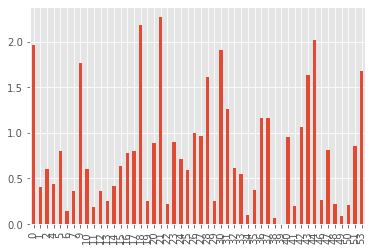

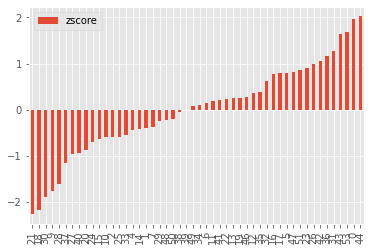

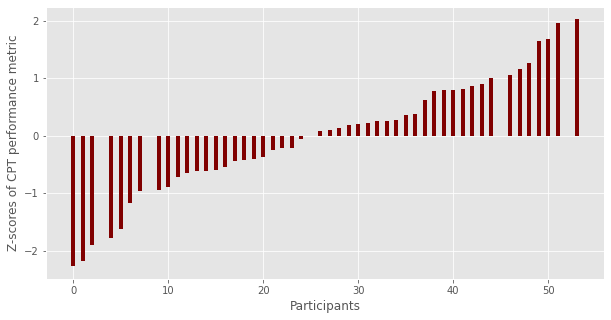

In [ ]:

CPT_normalised['zscore'].abs().plot.bar()
plott = CPT_normalised[['zscore']]
plott = plott.sort_values("zscore")
plott.plot.bar()
import matplotlib.pyplot as plt
 
  

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(CPT_normalised.index,sorted(CPT_normalised['zscore']) , color ='maroon',
        width = 0.4)
plt.ylabel('Z-scores of CPT performance metric')
plt.xlabel('Participants')

2. Stroop

Not categorised samples

In [ ]:
stroop_test.head()

,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index
0,90.0,89.0,30.0,30.0,60.0,59.0,734.75,854.0,845.083333,969.888136,100.0,98.0,13.610071,11.475410,8.509550
1,90.0,48.0,30.0,18.0,60.0,30.0,987.40,983.6,1077.838889,1107.826667,60.0,50.0,6.076565,5.083367,8.899673
2,90.0,88.0,30.0,28.0,60.0,60.0,801.75,884.4,839.321429,975.423333,93.0,100.0,11.599626,11.307101,1.277026
3,90.0,89.0,30.0,30.0,60.0,59.0,788.80,798.2,845.253333,888.462712,100.0,98.0,12.677485,12.277625,1.602318
4,90.0,83.0,30.0,30.0,60.0,53.0,825.30,849.1,933.140000,979.047170,100.0,88.0,12.116806,10.363915,7.797309


In [ ]:
stroop_clean, st_removed = remove_outliers(stroop_test,3,['accuracy_c','accuracy_i'])
display(st_removed)

removed entries-----  [ 1 21]


,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index,total_cpt,n_match,n_correct_match,n_nonmatch,n_correct_nonmatch,median_rt_cpt,mean_rt_cpt,miss_hits,false_alarms,false_alarm_rt,accuracy_match,accuracy_nonmatch,eff_match,mean_rt_tmt,trial1_rt,trial2_rt,trial3_rt
1,90.0,48.0,30.0,18.0,60.0,30.0,987.4,983.6,1077.838889,1107.826667,60.0,50.0,6.076565,5.083367,8.899673,80.0,29.0,18.0,51.0,51.0,934.70,961.716667,11.0,0.0,NaN,62.0,100.0,6.633144,2490.243210,2150.912500,2585.740741,2675.76
21,90.0,28.0,30.0,9.0,60.0,19.0,904.1,974.4,1108.033333,1094.757895,30.0,32.0,3.318217,3.284072,0.517165,80.0,20.0,12.0,60.0,32.0,988.15,1007.766667,8.0,28.0,1286.875,60.0,53.0,6.071953,2341.776543,2054.595833,2696.588889,2252.19


In [ ]:
stroop_clean.describe() 

,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index
count,52.0,52.000000,52.0,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,90.0,84.961538,30.0,28.615385,60.0,56.346154,827.221154,892.009615,915.756659,981.047987,95.500000,93.884615,12.004248,10.961772,4.670453
std,0.0,5.129544,0.0,1.573729,0.0,4.134430,180.073948,195.241655,216.543334,217.684459,5.226253,6.844645,2.331852,2.244510,6.173944
min,90.0,57.000000,30.0,23.000000,60.0,34.000000,565.700000,624.300000,600.289655,696.973684,77.000000,57.000000,6.800639,6.061799,-11.819821
25%,90.0,83.750000,30.0,28.000000,60.0,55.000000,704.600000,765.037500,735.945055,807.284530,93.000000,92.000000,10.518159,9.401606,1.520995
50%,90.0,86.000000,30.0,29.000000,60.0,57.000000,788.400000,834.800000,882.673506,923.985856,97.000000,95.000000,12.063373,11.443359,4.081065
75%,90.0,88.000000,30.0,30.000000,60.0,59.000000,903.787500,972.675000,1034.232184,1112.246765,100.000000,98.000000,13.453637,12.414552,8.064656
max,90.0,90.000000,30.0,30.000000,60.0,60.000000,1470.450000,1573.800000,1440.834483,1608.942373,100.000000,100.000000,17.146898,14.896684,19.434959


In [ ]:

stroop_normalised = stroop_clean[:]
stroop_normalised['eff_c_normalised'] = MinMaxScaler().fit_transform(np.array(stroop_normalised['eff_c']).reshape(-1,1))
stroop_normalised['eff_i_normalised'] = MinMaxScaler().fit_transform(np.array(stroop_normalised['eff_i']).reshape(-1,1))
# stroop_normalised = stroop_normalised[:]
stroop_normalised['stroop_score'] = stroop_normalised['eff_i_normalised'] + stroop_normalised['eff_c_normalised']
stroop_normalised['zscore_stroop'] = zscore(stroop_normalised.loc[:,['stroop_score']])
display(stroop_normalised)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,total_trials_stroop,total_correct,total_cong,correct_cong,total_incong,correct_incong,median_rt_c,median_rt_i,mean_rt_c,mean_rt_i,accuracy_c,accuracy_i,eff_c,eff_i,index,eff_c_normalised,eff_i_normalised,stroop_score,zscore_stroop
0,90.0,89.0,30.0,30.0,60.0,59.0,734.75,854.00,845.083333,969.888136,100.0,98.0,13.610071,11.475410,8.509550,0.658154,0.612754,1.270908,0.467166
2,90.0,88.0,30.0,28.0,60.0,60.0,801.75,884.40,839.321429,975.423333,93.0,100.0,11.599626,11.307101,1.277026,0.463838,0.593703,1.057541,-0.000046
3,90.0,89.0,30.0,30.0,60.0,59.0,788.80,798.20,845.253333,888.462712,100.0,98.0,12.677485,12.277625,1.602318,0.568017,0.703555,1.271571,0.468618
4,90.0,83.0,30.0,30.0,60.0,53.0,825.30,849.10,933.140000,979.047170,100.0,88.0,12.116806,10.363915,7.797309,0.513825,0.486946,1.000771,-0.124356
5,90.0,90.0,30.0,30.0,60.0,60.0,644.20,707.35,726.260000,785.513333,100.0,100.0,15.523129,14.137273,4.672413,0.843057,0.914044,1.757101,1.531790
6,90.0,83.0,30.0,29.0,60.0,54.0,788.00,776.30,799.027586,804.679630,97.0,90.0,12.309645,11.593456,2.996216,0.532464,0.626115,1.158579,0.221197
7,90.0,85.0,30.0,26.0,60.0,59.0,819.55,835.10,948.592308,921.440678,87.0,98.0,10.615582,11.735122,-5.008969,0.368727,0.642150,1.010877,-0.102228
8,90.0,87.0,30.0,30.0,60.0,57.0,923.75,1066.70,1057.066667,1252.207018,100.0,95.0,10.825440,8.905972,9.727982,0.389010,0.321925,0.710936,-0.759013
9,90.0,82.0,30.0,26.0,60.0,56.0,670.30,765.05,675.623077,828.194643,87.0,93.0,12.979263,12.156068,3.275050,0.597184,0.689796,1.286980,0.502360
10,90.0,87.0,30.0,29.0,60.0,58.0,645.50,700.60,634.155172,758.300000,97.0,97.0,15.027111,13.845275,4.093307,0.795116,0.880993,1.676109,1.354440


Text(0.5, 0, 'Participants')

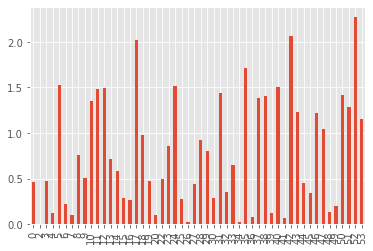

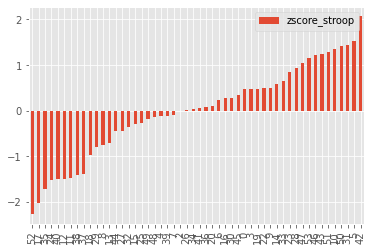

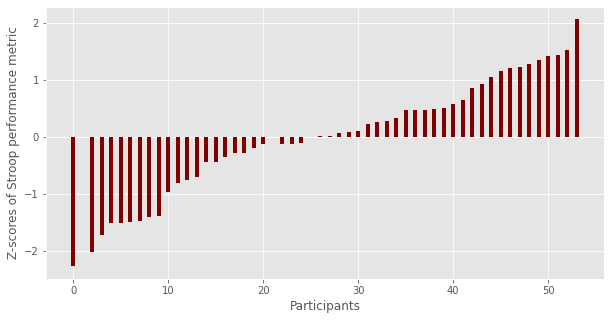

In [ ]:
stroop_normalised['zscore_stroop'].abs().plot.bar()
st_plott = stroop_normalised[['zscore_stroop']]
st_plott = st_plott.sort_values("zscore_stroop")
st_plott.plot.bar()

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(stroop_normalised.index,sorted(stroop_normalised['zscore_stroop']) , color ='maroon',
        width = 0.4)
plt.ylabel('Z-scores of Stroop performance metric')
plt.xlabel('Participants')